# K-Nearest Neighbors (KNN) from Scratch


## Introduction
**K-Nearest Neighbors (KNN)** is a simple and intuitive supervised machine learning algorithm primarily used for **classification** and **regression** tasks. It operates on the principle of similarity, using distance metrics to find the closest data points in the feature space.

**How it works**: Given a dataset with labeled instances, KNN predicts the label of a new, unseen data point by identifying the **K** nearest neighbors in the dataset.
- For **classification**, the prediction is based on the majority label among these neighbors.
- For **regression**, the algorithm predicts the average value of the neighbors.

**The role of K**: The parameter **K** determines the number of neighbors to consider. For example, with `k = 3`, the algorithm evaluates the 3 closest data points to the query instance.

**Applications**:
- **Image recognition**: Categorizing images based on similarity in pixel or feature representations.
- **Recommendation systems**: Suggesting items or content by identifying similar users or preferences.
- **Finance**: Predicting stock prices, credit scoring, etc.
    
**Advantages, Limitations and Practices**:
- It's easy to implement and effective for smaller datasets.
- It's non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution.
- Can be computationally expensive for large datasets, as it requires calculating distances for every point during inference.
- The algorithm is sensitive to feature scaling, so normalization of data is often necessary.
- Feature scaling techniques like Min-Max Scaling or Standardization ensures meaningful distance metrics.
- The choice of K and the distance metric (explained down) can significantly impact performance.

## Distance Metrics
#### **1. Manhattan Distance**
Measures the distance between two points by summing the absolute differences of their coordinates.
$$
D_{\text{Manhattan}}(A, B) = \sum_{i=1}^{n} |A_i - B_i|
$$

#### **2. Euclidean Distance**
Measures the straight-line distance between two points in Euclidean space.
$$
D_{\text{Euclidean}}(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
$$

#### **3. Minkowski Distance**
A generalized distance metric that includes Manhattan and Euclidean as special cases.
$$
D_{\text{Minkowski}}(A, B) = \left( \sum_{i=1}^{n} |A_i - B_i|^p \right)^{\frac{1}{p}}
$$
Special cases:
- \(p = 1\): Manhattan Distance
- \(p = 2\): Euclidean Distance

#### **4. Chebyshev Distance**
Measures the maximum absolute difference along any coordinate dimension.
$$
D_{\text{Chebyshev}}(A, B) = \max_{i=1}^{n} |A_i - B_i|
$$

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Implementing the KNN Class

In [2]:
class KNN:
    def __init__(self, *, k=3, metric="euclidean", p=3):
        """Initialize the KNN model with parameters
        k: the number of nearest neighbors
        metric: the distance metric to use ('manhattan/l1', 'euclidean/l2', 'minkowski/l3', 'chebyshev/l4')
        p: parameter for Minkowski distance (default is 3 for L3 norm)"""

        self.k = k
        self.metric = metric
        self.p = p

    def distance(self, x1: np.ndarray, x2: np.ndarray) -> float:
        # Calculate the distance between two data points (x1, x2)

        # Manhattan Distance (L1 Norm)
        if self.metric in ("manhattan", "l1"):
            return np.sum(np.abs(x1 - x2))
        # Euclidean Distance (L2 Norm)
        elif self.metric in ("euclidean", "l2"):
            return np.sqrt(np.sum((x1 - x2) ** 2))
        # Minkowski Distance (L3 Norm)
        elif self.metric in ("minkowski", "l3"):
            # Use the p value for Minkowski distance
            p = (self.p if hasattr(self, "p") else 3)
            return np.power(np.sum(np.abs(x1 - x2) ** p), 1 / p)
        # Chebyshev Distance (L4 Norm)
        elif self.metric in ("chebyshev", "l4"):
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported distance metric: {self.metric}")

    def fit(self, X: np.ndarray, y: np.ndarray):
        """Fit the model with training data
        X: feature matrix of training data
        y: target labels corresponding to the training data"""

        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
            raise ValueError("X and y must be NumPy arrays.")
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> list:
        # Predict the labels for the given test data X
        return [self._predict(x) for x in X]

    def _predict(self, x: np.ndarray) -> int:
        # Helper function for predict(). Predicts the label for a single test point x

        # Calculate the distance from x to all training points
        calculated_distance = [self.distance(x, x_train) for x_train in self.X_train]
        # Find the indices of the k nearest neighbors
        k_indices = np.argsort(calculated_distance)[: self.k]
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Find the most common label (the majority vote)
        most_common = Counter(k_nearest_labels).most_common()
        # Return the label with the highest count
        return most_common[0][0]

    def score(self, X: np.ndarray, y: np.ndarray) -> str:
        # Calculate the accuracy of the model on the test data X and true labels y
        predictions = self.predict(X)
        accuracy = np.mean(np.array(predictions) == np.array(y))
        correctly_labeled = np.sum(np.array(predictions) == np.array(y))
        falsely_labeled = len(y) - correctly_labeled

        # Format and return the results
        result = (
            f"Test size = {len(y)}\n"
            f"Correctly labeled: {correctly_labeled}\n"
            f"Misclassified: {falsely_labeled}\n"
            f"Accuracy: {accuracy:.5f} | {accuracy * 100:.2f}%\n"
        )
        return result

## Iris Dataset

Dataset Information:
Dataset size: 150 samples, 4 features
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label Names: ['setosa' 'versicolor' 'virginica']


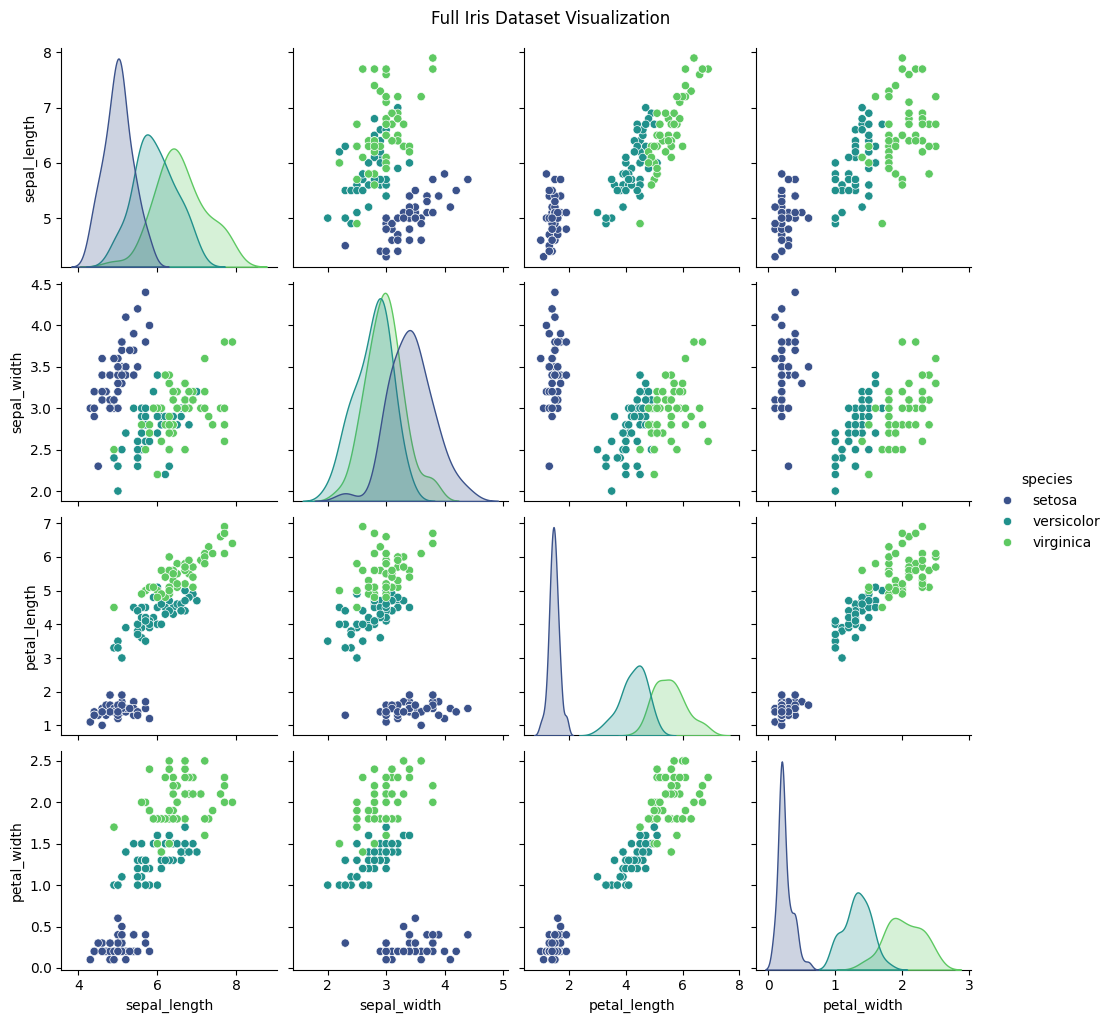

In [3]:
# Load the Iris dataset from sklearn and Seaborn
iris = datasets.load_iris()
iris_df = sns.load_dataset("iris")

# Assign features (X) and labels (y) to variables
X = iris.data # Features
y = iris.target # Labels

# Print basic information about the dataset
print("Dataset Information:")
print(f"Dataset size: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Feature Names: {iris.feature_names}")
print(f"Label Names: {iris.target_names}")

# Create and display a pairplot to visualize relationships between all feature pairs
sns.pairplot(iris_df, hue="species", palette="viridis")
plt.suptitle("Full Iris Dataset Visualization", y=1.02)
plt.show()

## Training and Testing the KNN Model

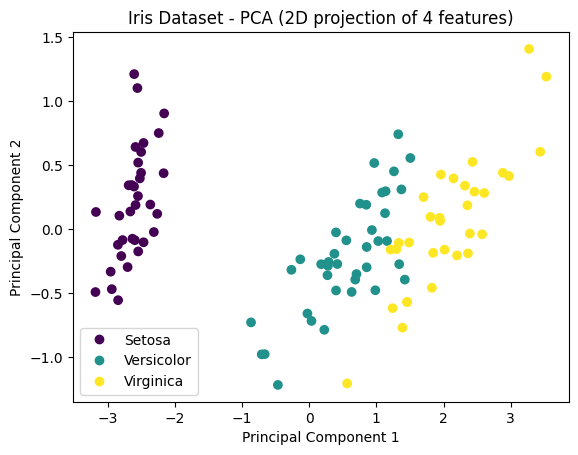

Test size = 45
Correctly labeled: 44
Misclassified: 1
Accuracy: 0.97778 | 97.78%



In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Apply PCA to reduce the feature space from 4 dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the transformed training data using the first two principal components
plt.figure()
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.title("Iris Dataset - PCA (2D projection of 4 features)")
plt.xlabel("Principal Component 1")  # X-axis for the first principal component
plt.ylabel("Principal Component 2")  # Y-axis for the second principal component
plt.legend(handles=scatter.legend_elements()[0], labels=["Setosa", "Versicolor", "Virginica"])
plt.show()

# Initialize and train the KNN model
knn = KNN(k=3, metric="l2")
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)